# Utilização de algoritmos de inteligência artificial na previsão de resultados de partidas de futebol

Estudo e comparação do desempenho de diferentes algoritmos de inteligência artificial

TCC do curso de Ciência da Computação do Instituto Federal do Triângulo Mineiro - Campus Ituiutaba

Autor: Olesio Gardenghi Neto

## Pré-processamento dos dados

In [1]:
# Import das bibliotecas que serão utilizadas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
# Mudando o estilo de plot dos gráficos
plt.style.use('seaborn')
# Comando para mostrar os gráficos dentro do Jupyter
%matplotlib inline

In [2]:
# Lendo a base de dados e transformando em dataframe
df = pd.read_csv("data/PremierLeague.csv")

In [3]:
df.head()

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,BbAv<2.5,BbAH,BbAHh,BbMxAHH,BbAvAHH,BbMxAHA,BbAvAHA,PSCH,PSCD,PSCA
0,E0,10/08/2018,Man United,Leicester,2,1,H,1,0,H,...,1.79,17,-0.75,1.75,1.70,2.29,2.21,1.55,4.07,7.69
1,E0,11/08/2018,Bournemouth,Cardiff,2,0,H,1,0,H,...,1.83,20,-0.75,2.20,2.13,1.80,1.75,1.88,3.61,4.70
2,E0,11/08/2018,Fulham,Crystal Palace,0,2,A,0,1,A,...,1.87,22,-0.25,2.18,2.11,1.81,1.77,2.62,3.38,2.90
3,E0,11/08/2018,Huddersfield,Chelsea,0,3,A,0,2,A,...,1.84,23,1.00,1.84,1.80,2.13,2.06,7.24,3.95,1.58
4,E0,11/08/2018,Newcastle,Tottenham,1,2,A,1,2,A,...,1.81,20,0.25,2.20,2.12,1.80,1.76,4.74,3.53,1.89


In [4]:
df.columns

Index(['Div', 'Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HTHG',
       'HTAG', 'HTR', 'Referee', 'HS', 'AS', 'HST', 'AST', 'HF', 'AF', 'HC',
       'AC', 'HY', 'AY', 'HR', 'AR', 'B365H', 'B365D', 'B365A', 'BWH', 'BWD',
       'BWA', 'IWH', 'IWD', 'IWA', 'PSH', 'PSD', 'PSA', 'WHH', 'WHD', 'WHA',
       'VCH', 'VCD', 'VCA', 'Bb1X2', 'BbMxH', 'BbAvH', 'BbMxD', 'BbAvD',
       'BbMxA', 'BbAvA', 'BbOU', 'BbMx>2.5', 'BbAv>2.5', 'BbMx<2.5',
       'BbAv<2.5', 'BbAH', 'BbAHh', 'BbMxAHH', 'BbAvAHH', 'BbMxAHA', 'BbAvAHA',
       'PSCH', 'PSCD', 'PSCA'],
      dtype='object')

#### Descrição das colunas
Key to results data:

Div = League Division  
Date = Match Date (dd/mm/yy)  
Time = Time of match kick off  
HomeTeam = Home Team  
AwayTeam = Away Team  
FTHG and HG = Full Time Home Team Goals  
FTAG and AG = Full Time Away Team Goals  
FTR and Res = Full Time Result (H=Home Win, D=Draw, A=Away Win)  
HTHG = Half Time Home Team Goals  
HTAG = Half Time Away Team Goals  
HTR = Half Time Result (H=Home Win, D=Draw, A=Away Win)  

Match Statistics (where available)  
Attendance = Crowd Attendance  
Referee = Match Referee  
HS = Home Team Shots  
AS = Away Team Shots  
HST = Home Team Shots on Target  
AST = Away Team Shots on Target  
HHW = Home Team Hit Woodwork  
AHW = Away Team Hit Woodwork  
HC = Home Team Corners  
AC = Away Team Corners  
HF = Home Team Fouls Committed  
AF = Away Team Fouls Committed  
HFKC = Home Team Free Kicks Conceded  
AFKC = Away Team Free Kicks Conceded  
HO = Home Team Offsides  
AO = Away Team Offsides  
HY = Home Team Yellow Cards  
AY = Away Team Yellow Cards  
HR = Home Team Red Cards  
AR = Away Team Red Cards  
HBP = Home Team Bookings Points (10 = yellow, 25 = red)  
ABP = Away Team Bookings Points (10 = yellow, 25 = red)  

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380 entries, 0 to 379
Data columns (total 62 columns):
Div         380 non-null object
Date        380 non-null object
HomeTeam    380 non-null object
AwayTeam    380 non-null object
FTHG        380 non-null int64
FTAG        380 non-null int64
FTR         380 non-null object
HTHG        380 non-null int64
HTAG        380 non-null int64
HTR         380 non-null object
Referee     380 non-null object
HS          380 non-null int64
AS          380 non-null int64
HST         380 non-null int64
AST         380 non-null int64
HF          380 non-null int64
AF          380 non-null int64
HC          380 non-null int64
AC          380 non-null int64
HY          380 non-null int64
AY          380 non-null int64
HR          380 non-null int64
AR          380 non-null int64
B365H       380 non-null float64
B365D       380 non-null float64
B365A       380 non-null float64
BWH         380 non-null float64
BWD         380 non-null float64
BWA       

In [6]:
df.describe()

,FTHG,FTAG,HTHG,HTAG,HS,AS,HST,AST,HF,AF,...,BbAv<2.5,BbAH,BbAHh,BbMxAHH,BbAvAHH,BbMxAHA,BbAvAHA,PSCH,PSCD,PSCA
count,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,...,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000
mean,1.568421,1.252632,0.678947,0.573684,14.134211,11.144737,4.778947,3.928947,10.152632,10.305263,...,2.126895,20.736842,-0.327632,2.025184,1.962447,2.002395,1.942053,3.332974,4.576342,5.620132
std,1.312836,1.180031,0.860802,0.766958,5.855371,4.654002,2.677686,2.283982,3.293532,3.503707,...,0.467750,1.571249,1.056248,0.247373,0.230633,0.226581,0.215442,3.137394,2.019487,5.779454
min,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,3.000000,...,1.450000,17.000000,-3.000000,1.550000,1.500000,1.440000,1.400000,1.070000,2.930000,1.120000
25%,1.000000,0.000000,0.000000,0.000000,10.000000,8.000000,3.000000,2.000000,8.000000,8.000000,...,1.797500,20.000000,-1.000000,1.830000,1.787500,1.817500,1.770000,1.595000,3.410000,2.335000
50%,1.000000,1.000000,0.000000,0.000000,14.000000,11.000000,5.000000,4.000000,10.000000,10.000000,...,2.030000,21.000000,-0.250000,2.000000,1.930000,1.995000,1.940000,2.350000,3.765000,3.415000
75%,2.000000,2.000000,1.000000,1.000000,18.000000,14.000000,6.000000,5.250000,12.000000,13.000000,...,2.330000,22.000000,0.250000,2.190000,2.120000,2.152500,2.092500,3.380000,4.842500,6.565000
max,6.000000,6.000000,4.000000,3.000000,36.000000,25.000000,14.000000,12.000000,23.000000,21.000000,...,4.170000,24.000000,2.500000,3.150000,3.010000,2.770000,2.650000,24.770000,14.920000,36.050000


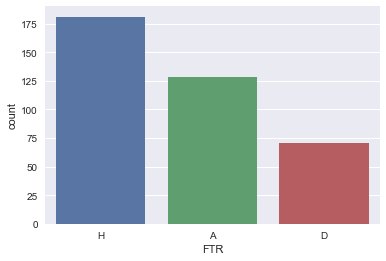

In [7]:
# H - Home(Casa), A - Away(Fora) e D - Draw(Empate)
sns.countplot(x='FTR', data=df)

In [8]:
# Selecionando apenas as características que nos interessa
df = df[['FTR','HS','AS','HST','AST','HF','AF','HC','AC','HY','AY','HR','AR','HTHG','HTAG','HTR']]

In [9]:
df.head()

,FTR,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,HTHG,HTAG,HTR
0,H,8,13,6,4,11,8,2,5,2,1,0,0,1,0,H
1,H,12,10,4,1,11,9,7,4,1,1,0,0,1,0,H
2,A,15,10,6,9,9,11,5,5,1,2,0,0,0,1,A
3,A,6,13,1,4,9,8,2,5,2,1,0,0,0,2,A
4,A,15,15,2,5,11,12,3,5,2,2,0,0,1,2,A


In [10]:
# Transformando os dados categóricos de FTR para numéricos
label_encoder = preprocessing.LabelEncoder()
label_encoder.fit(df['FTR'])
df['FTR'] = label_encoder.transform(df['FTR'])

# Transformando os dados categóricos de HTR para numéricos
label_encoder = preprocessing.LabelEncoder()
label_encoder.fit(df['HTR'])
df['HTR'] = label_encoder.transform(df['HTR'])

df.head()

,FTR,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,HTHG,HTAG,HTR
0,2,8,13,6,4,11,8,2,5,2,1,0,0,1,0,2
1,2,12,10,4,1,11,9,7,4,1,1,0,0,1,0,2
2,0,15,10,6,9,9,11,5,5,1,2,0,0,0,1,0
3,0,6,13,1,4,9,8,2,5,2,1,0,0,0,2,0
4,0,15,15,2,5,11,12,3,5,2,2,0,0,1,2,0


In [11]:
# Normalizando os dados com o StandardScaler
# A distribuição dos dados será transformada tal que sua média = 0 e o desvio padrão = 1
# z = (x-u)/σ
# x = dados, u = média, σ = desvio padrão
scaler = StandardScaler()
scaler.fit(df.drop(['FTR'],axis=1))
dados_normalizados = scaler.transform(df.drop(['FTR'],axis=1))
df_normalizado = pd.DataFrame(dados_normalizados, columns=df.columns[1:])
df = df[['FTR']]
df = pd.concat([df, df_normalizado], axis=1, sort=False)
df.head()

,FTR,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,HTHG,HTAG,HTR
0,2,-1.049002,0.399164,0.456612,0.031150,0.257622,-0.658817,-1.248486,0.164050,0.387873,-0.566612,-0.222988,-0.277274,0.373461,-0.748986,1.215218
1,2,-0.364968,-0.246293,-0.291287,-1.284077,0.257622,-0.373029,0.436261,-0.202649,-0.430970,-0.566612,-0.222988,-0.277274,0.373461,-0.748986,1.215218
2,0,0.148057,-0.246293,0.456612,2.223195,-0.350430,0.198548,-0.237638,0.164050,-0.430970,0.261513,-0.222988,-0.277274,-0.789778,0.556586,-1.350242
3,0,-1.391019,0.399164,-1.413134,0.031150,-0.350430,-0.658817,-1.248486,0.164050,0.387873,-0.566612,-0.222988,-0.277274,-0.789778,1.862158,-1.350242
4,0,0.148057,0.829468,-1.039185,0.469559,0.257622,0.484336,-0.911537,0.164050,0.387873,0.261513,-0.222988,-0.277274,0.373461,1.862158,-1.350242


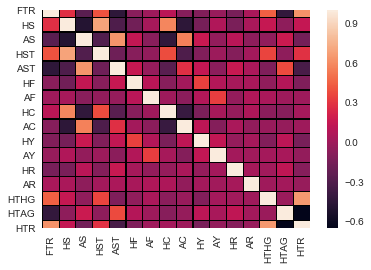

In [12]:
#Mapa de calor de correlações
sns.heatmap(df.corr(),linewidths=0.1,linecolor="black")

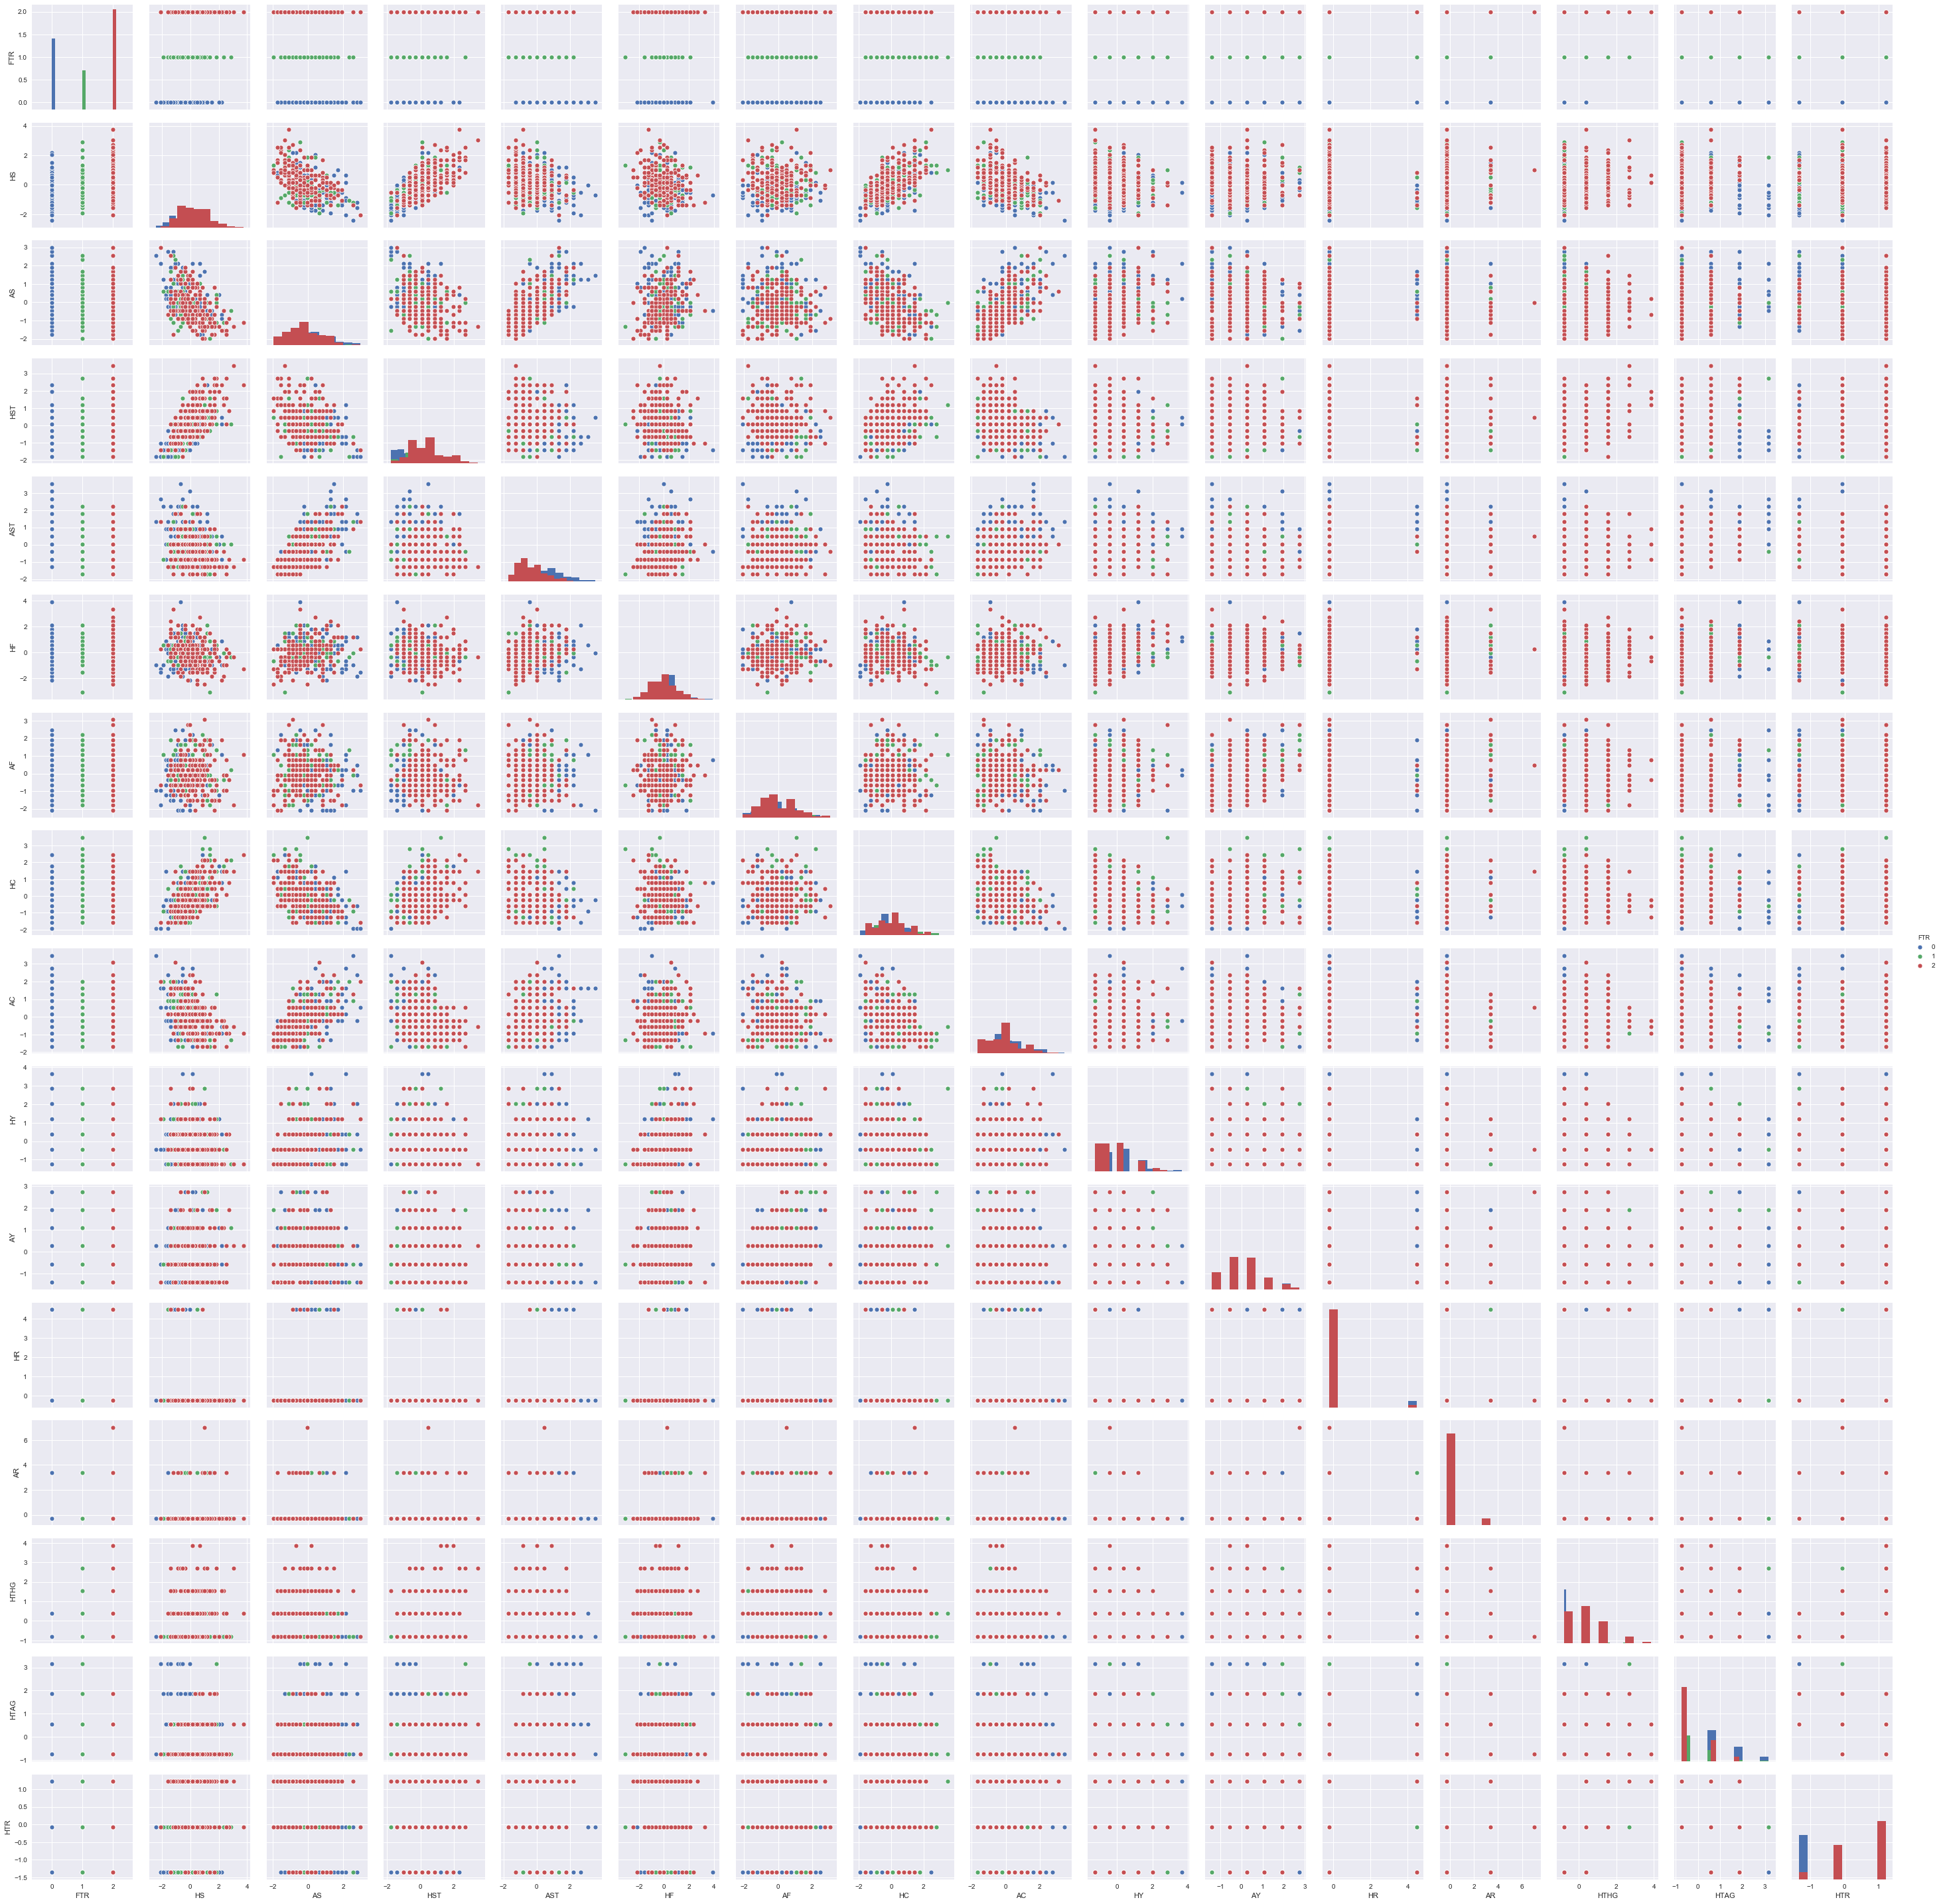

In [13]:
#Distribuição dos dados em pares
sns.pairplot(data=df,hue="FTR", diag_kind='hist')

## Aplicando os algoritmos de IA

In [14]:
# Características
X = df.drop('FTR',axis=1)
# Alvo da previsão
y = df['FTR']

In [15]:
# Divisão treino/teste
# 70% dos dados para treino e 30% para teste
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=101)

In [16]:
df_y_test = y_test.reset_index()
df_y_test.drop('index',axis=1, inplace=True)

### Regressão Linear

In [17]:
from sklearn.linear_model import LinearRegression

In [18]:
linear_regression = LinearRegression()
linear_regression.fit(X_train, y_train)
predict_linear_regression = linear_regression.predict(X_test)

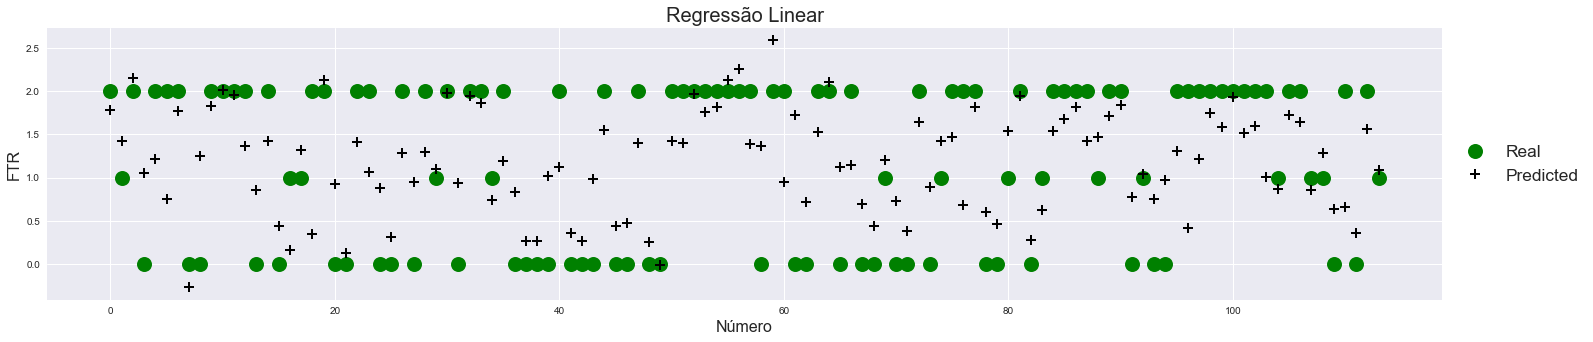

In [19]:
plt.figure(figsize=(25, 5))
plt.plot(df_y_test, 'go', ms=15, label='Real')
plt.plot(predict_linear_regression, '+', color='black', ms=10, markeredgewidth=2, label='Predicted')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize = 'xx-large')
plt.ylabel('FTR',fontsize=16)
plt.xlabel('Número',fontsize=16)
plt.title('Regressão Linear',fontsize=20)
plt.show()

In [20]:
print('Score Regressão Linear: %.2f' %linear_regression.score(X_test, y_test))

Score Regressão Linear: 0.49


### Regressão Logística

In [21]:
from sklearn.linear_model import LogisticRegression

In [22]:
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train, y_train)
predict_logistic_regression = logistic_regression.predict(X_test)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [23]:
print(classification_report(y_test,predict_logistic_regression))
print(confusion_matrix(y_test,predict_logistic_regression))
print('\nScore Regressão Log: %.2f' %logistic_regression.score(X_test, y_test))

              precision    recall  f1-score   support

           0       0.74      0.74      0.74        39
           1       0.30      0.20      0.24        15
           2       0.82      0.88      0.85        60

    accuracy                           0.75       114
   macro avg       0.62      0.61      0.61       114
weighted avg       0.72      0.75      0.73       114

[[29  6  4]
 [ 4  3  8]
 [ 6  1 53]]

Score Regressão Log: 0.75


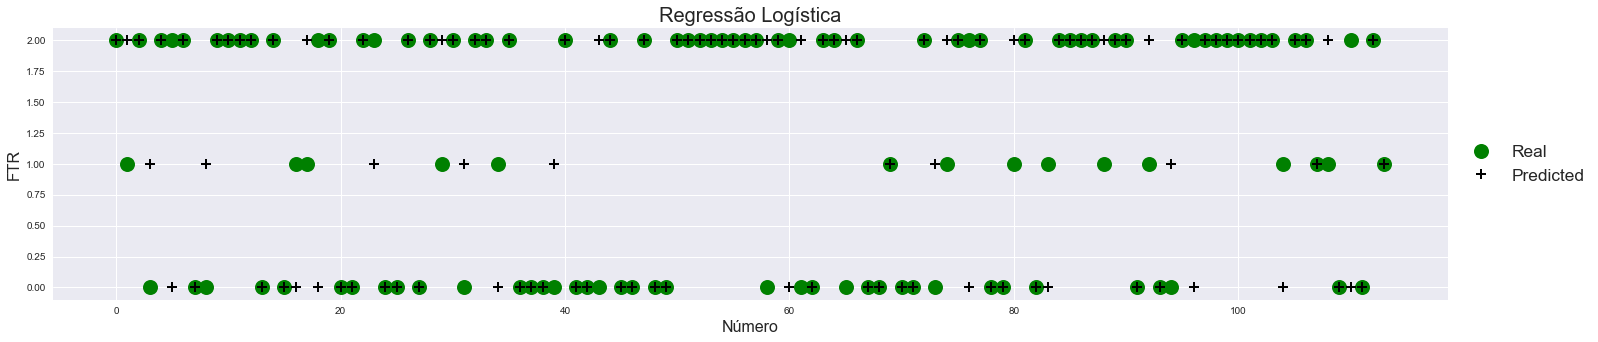

In [24]:
plt.figure(figsize=(25, 5))
plt.plot(df_y_test, 'go', ms=15, label='Real')
plt.plot(predict_logistic_regression, '+', color='black', ms=10, markeredgewidth=2, label='Predicted')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize = 'xx-large')
plt.ylabel('FTR',fontsize=16)
plt.xlabel('Número',fontsize=16)
plt.title('Regressão Logística',fontsize=20)
plt.show()

### Árvore de Decisão

In [25]:
from sklearn.tree import DecisionTreeClassifier

In [26]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
predict_decision_tree = decision_tree.predict(X_test)

In [27]:
print(classification_report(y_test,predict_decision_tree))
print(confusion_matrix(y_test,predict_decision_tree))
print('\nScore Árvore de Decisão: %.2f' %decision_tree.score(X_test, y_test))

              precision    recall  f1-score   support

           0       0.64      0.64      0.64        39
           1       0.04      0.07      0.05        15
           2       0.80      0.65      0.72        60

    accuracy                           0.57       114
   macro avg       0.49      0.45      0.47       114
weighted avg       0.64      0.57      0.60       114

[[25 12  2]
 [ 6  1  8]
 [ 8 13 39]]

Score Árvore de Decisão: 0.57


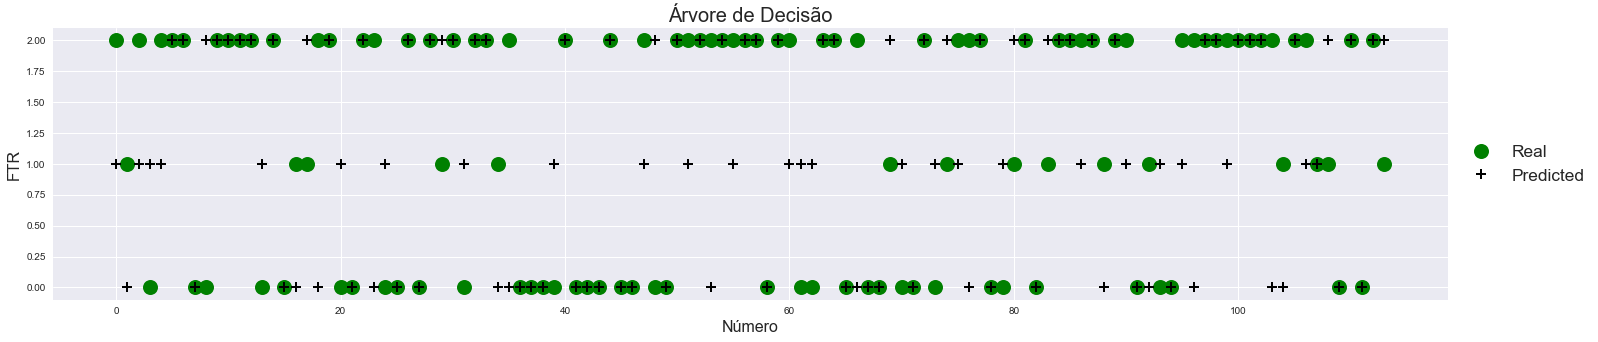

In [28]:
plt.figure(figsize=(25, 5))
plt.plot(df_y_test, 'go', ms=15, label='Real')
plt.plot(predict_decision_tree, '+', color='black', ms=10, markeredgewidth=2, label='Predicted')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize = 'xx-large')
plt.ylabel('FTR',fontsize=16)
plt.xlabel('Número',fontsize=16)
plt.title('Árvore de Decisão',fontsize=20)
plt.show()

### Floresta Aleatória

In [29]:
from sklearn.ensemble import RandomForestClassifier

In [30]:
#Método do cotovelo
error_rate = []

for i in range(1,200):
    random_forest = RandomForestClassifier(n_estimators=i)
    random_forest.fit(X_train, y_train)
    predict_random_forest = random_forest.predict(X_test)
    error_rate.append(np.mean(predict_random_forest!=y_test))

Text(0.5, 1.0, 'Taxa de erro vs. Number estimativas')

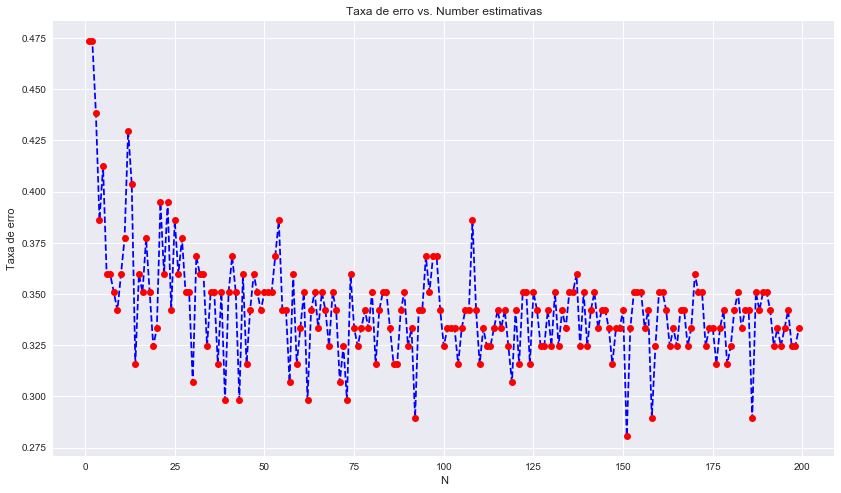

In [31]:
plt.figure(figsize=(14,8))
plt.plot(range(1,200),error_rate,color="blue",linestyle='dashed',marker='o',markerfacecolor='red')
plt.xlabel('N')
plt.ylabel("Taxa de erro")
plt.title("Taxa de erro vs. Number estimativas")

In [32]:
random_forest = RandomForestClassifier(n_estimators=error_rate.index(min(error_rate)))
random_forest.fit(X_train, y_train)
predict_random_forest = random_forest.predict(X_test)

In [33]:
print(classification_report(y_test,predict_random_forest))
print(confusion_matrix(y_test,predict_random_forest))
print('\nScore Floresta Aleatória: %.2f' %random_forest.score(X_test, y_test))

              precision    recall  f1-score   support

           0       0.69      0.62      0.65        39
           1       0.15      0.13      0.14        15
           2       0.74      0.82      0.78        60

    accuracy                           0.66       114
   macro avg       0.53      0.52      0.52       114
weighted avg       0.65      0.66      0.65       114

[[24  7  8]
 [ 4  2  9]
 [ 7  4 49]]

Score Floresta Aleatória: 0.66


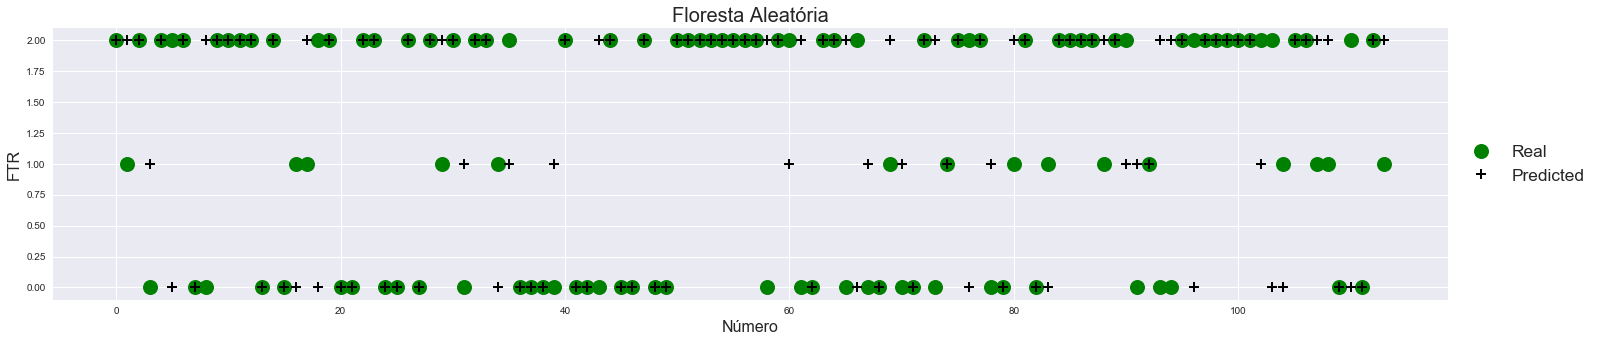

In [34]:
plt.figure(figsize=(25, 5))
plt.plot(df_y_test, 'go', ms=15, label='Real')
plt.plot(predict_random_forest, '+', color='black', ms=10, markeredgewidth=2, label='Predicted')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize = 'xx-large')
plt.ylabel('FTR',fontsize=16)
plt.xlabel('Número',fontsize=16)
plt.title('Floresta Aleatória',fontsize=20)
plt.show()

### K Nearest Neighbours (KNN)

In [35]:
from sklearn.neighbors import KNeighborsClassifier

In [36]:
error_rate = []

for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    predict_knn = knn.predict(X_test)
    error_rate.append(np.mean(predict_knn!=y_test))

Text(0.5, 1.0, 'Taxa de erro vs. Number estimativas')

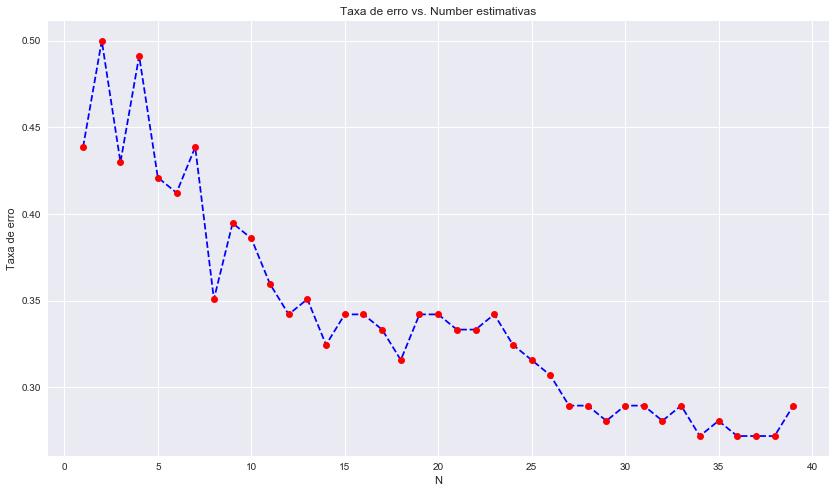

In [37]:
plt.figure(figsize=(14,8))
plt.plot(range(1,40),error_rate,color="blue",linestyle='dashed',marker='o',markerfacecolor='red')
plt.xlabel('N')
plt.ylabel("Taxa de erro")
plt.title("Taxa de erro vs. Number estimativas")

In [38]:
knn = KNeighborsClassifier(n_neighbors=error_rate.index(min(error_rate)))
knn.fit(X_train, y_train)
predict_knn = knn.predict(X_test)

In [39]:
print(classification_report(y_test,predict_knn))
print(confusion_matrix(y_test,predict_knn))
print('\nScore KNN: %.2f' %knn.score(X_test, y_test))

              precision    recall  f1-score   support

           0       0.78      0.72      0.75        39
           1       0.20      0.13      0.16        15
           2       0.75      0.85      0.80        60

    accuracy                           0.71       114
   macro avg       0.58      0.57      0.57       114
weighted avg       0.69      0.71      0.70       114

[[28  4  7]
 [ 3  2 10]
 [ 5  4 51]]

Score KNN: 0.71


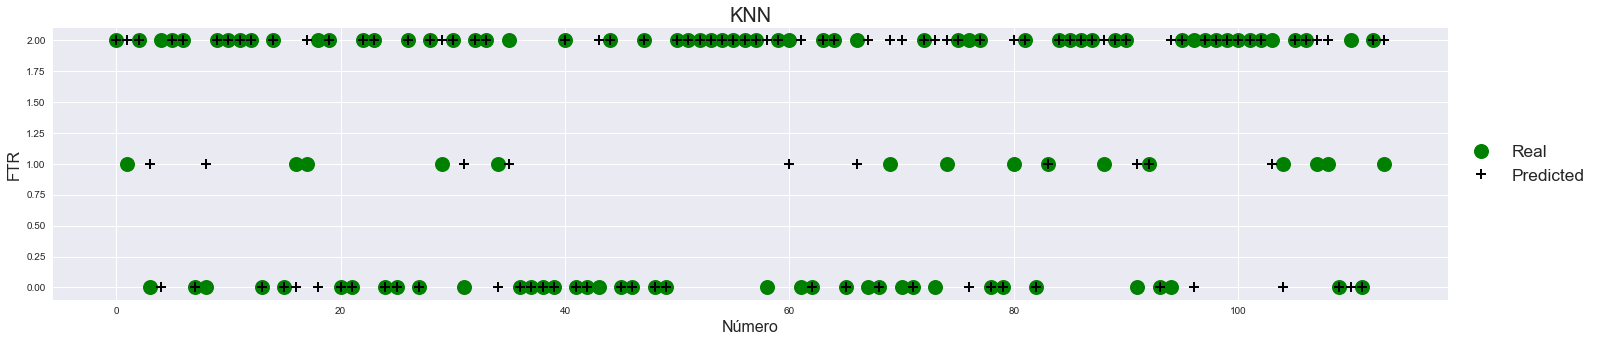

In [40]:
plt.figure(figsize=(25, 5))
plt.plot(df_y_test, 'go', ms=15, label='Real')
plt.plot(predict_knn, '+', color='black', ms=10, markeredgewidth=2, label='Predicted')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize = 'xx-large')
plt.ylabel('FTR',fontsize=16)
plt.xlabel('Número',fontsize=16)
plt.title('KNN',fontsize=20)
plt.show()

### Support-vector Machine (SVM)

In [41]:
from sklearn.svm import SVC

In [42]:
param_grid = {'C':[0.1,1,10,100,1000],'gamma': [1,0.1,0.01,0.001,0.001], 'kernel':['rbf']}
grid = GridSearchCV(SVC(),param_grid,refit=True, verbose=3)
grid.fit(X_train, y_train)
print(grid.best_params_)
predict_svm = grid.predict(X_test)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.456, total=   0.4s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.449, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.460, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.456, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.461, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.483, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.3s remaining:    0.0s


[CV] ...... C=0.1, gamma=0.001, kernel=rbf, score=0.460, total=   0.0s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ............ C=1, gamma=1, kernel=rbf, score=0.456, total=   0.0s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ............ C=1, gamma=1, kernel=rbf, score=0.449, total=   0.0s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ............ C=1, gamma=1, kernel=rbf, score=0.460, total=   0.0s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV] .......... C=1, gamma=0.1, kernel=rbf, score=0.622, total=   0.0s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV] .......... C=1, gamma=0.1, kernel=rbf, score=0.697, total=   0.0s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV] .......... C=1, gamma=0.1, kernel=rbf, score=0.655, total=   0.0s
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV] .

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    1.4s finished
C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [43]:
print(classification_report(y_test,predict_svm))
print(confusion_matrix(y_test,predict_svm))
print('\nScore SVM: %.2f' %grid.score(X_test, y_test))

              precision    recall  f1-score   support

           0       0.71      0.64      0.68        39
           1       0.19      0.20      0.19        15
           2       0.75      0.78      0.76        60

    accuracy                           0.66       114
   macro avg       0.55      0.54      0.54       114
weighted avg       0.66      0.66      0.66       114

[[25  6  8]
 [ 4  3  8]
 [ 6  7 47]]

Score SVM: 0.66


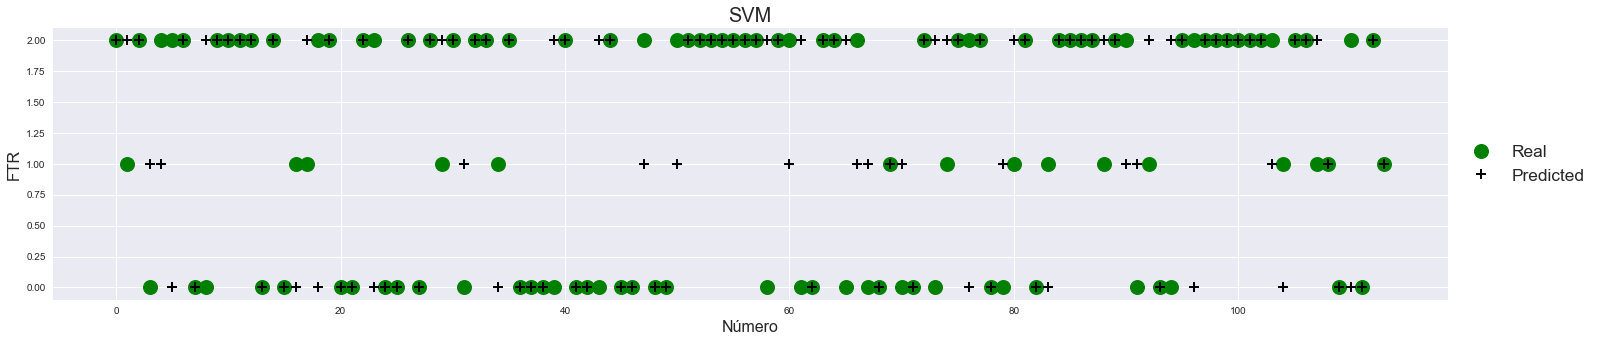

In [44]:
plt.figure(figsize=(25, 5))
plt.plot(df_y_test, 'go', ms=15, label='Real')
plt.plot(predict_svm, '+', color='black', ms=10, markeredgewidth=2, label='Predicted')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize = 'xx-large')
plt.ylabel('FTR',fontsize=16)
plt.xlabel('Número',fontsize=16)
plt.title('SVM',fontsize=20)
plt.show()

### Multi-layer Perceptron Classifier

In [45]:
from sklearn.neural_network import MLPClassifier

In [46]:
mlp_classifier = MLPClassifier(hidden_layer_sizes=(1,8), activation='logistic', solver='adam', max_iter=1000)
mlp_classifier.fit(X_train,y_train)
predict_mlp_classifier = mlp_classifier.predict(X_test)

In [47]:
#print(classification_report(y_test,predict_mlp))
print(confusion_matrix(y_test,predict_mlp_classifier))
print('\nScore MLP: %.2f' %mlp_classifier.score(X_test, y_test))

[[33  0  6]
 [ 6  0  9]
 [ 7  0 53]]

Score MLP: 0.75


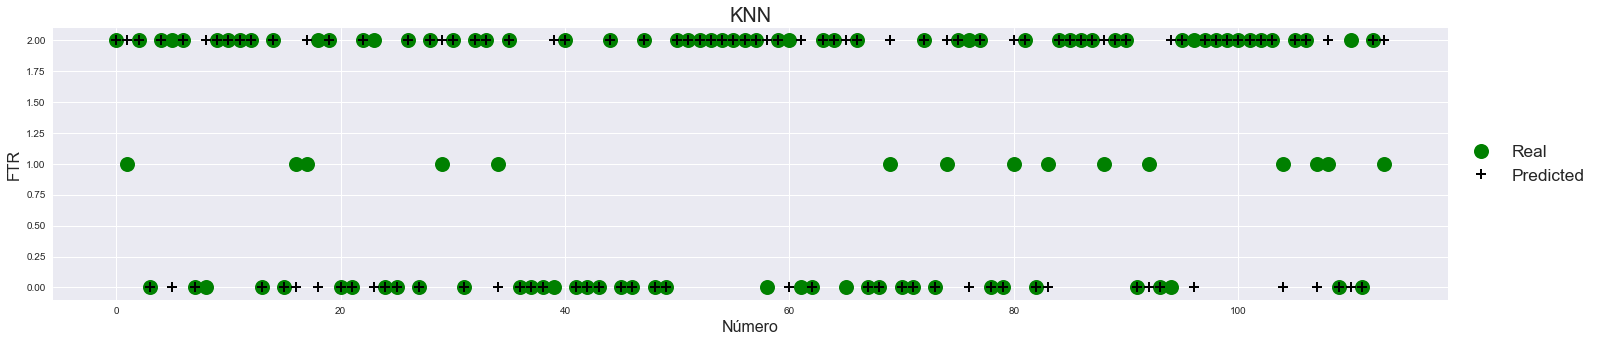

In [48]:
plt.figure(figsize=(25, 5))
plt.plot(df_y_test, 'go', ms=15, label='Real')
plt.plot(predict_mlp_classifier, '+', color='black', ms=10, markeredgewidth=2, label='Predicted')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize = 'xx-large')
plt.ylabel('FTR',fontsize=16)
plt.xlabel('Número',fontsize=16)
plt.title('KNN',fontsize=20)
plt.show()

## Resultados finais

In [49]:
print('Regressão linear: %.2f' %(linear_regression.score(X_test, y_test)*100) + "%") 
print('\nRegressão logística: %.2f' %(logistic_regression.score(X_test, y_test)*100) + "%")
print('\nÁrvore de decisão: %.2f' %(decision_tree.score(X_test, y_test)*100) + "%")
print('\nFloresta aleatória: %.2f' %(random_forest.score(X_test, y_test)*100) + "%")
print('\nKNN: %.2f' %(knn.score(X_test, y_test)*100) + "%")
print('\nSVM: %.2f' %(grid.score(X_test, y_test)*100) + "%")
print('\nMLP: %.2f' %(mlp_classifier.score(X_test, y_test)*100) + "%")

Regressão linear: 48.57%

Regressão logística: 74.56%

Árvore de decisão: 57.02%

Floresta aleatória: 65.79%

KNN: 71.05%

SVM: 65.79%

MLP: 75.44%


## Outra abordagem

In [50]:
df = pd.read_csv("data/PremierLeague.csv")

# Selecionando apenas as características que nos interessa
df = df[['FTR','HS','AS','HST','AST','HF','AF','HC','AC','HY','AY','HR','AR','HTHG','HTAG','HTR']]

# Transforma empate em fora
def away_to_defeat(x):
    if(x == 'A' or x == 'D'):
        return 'A'
    else:
        return 'H'

df['FTR'] = df['FTR'].apply(away_to_defeat)

# Remover as linhas com empate
#df_remove = df.loc[df['FTR'] == 'D']
#df.drop(df_remove.index, inplace=True)


df.head()

,FTR,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,HTHG,HTAG,HTR
0,H,8,13,6,4,11,8,2,5,2,1,0,0,1,0,H
1,H,12,10,4,1,11,9,7,4,1,1,0,0,1,0,H
2,A,15,10,6,9,9,11,5,5,1,2,0,0,0,1,A
3,A,6,13,1,4,9,8,2,5,2,1,0,0,0,2,A
4,A,15,15,2,5,11,12,3,5,2,2,0,0,1,2,A


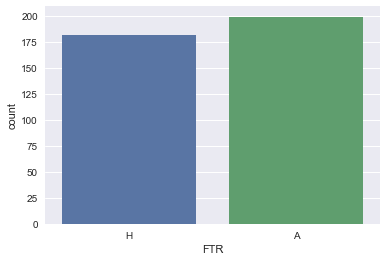

In [51]:
sns.countplot(x='FTR', data=df)

In [52]:
# Transformando os dados categóricos de FTR para numéricos
label_encoder = preprocessing.LabelEncoder()
label_encoder.fit(df['FTR'])
df['FTR'] = label_encoder.transform(df['FTR'])

# Transformando os dados categóricos de HTR para numéricos
label_encoder = preprocessing.LabelEncoder()
label_encoder.fit(df['HTR'])
df['HTR'] = label_encoder.transform(df['HTR'])

df.head()

,FTR,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,HTHG,HTAG,HTR
0,1,8,13,6,4,11,8,2,5,2,1,0,0,1,0,2
1,1,12,10,4,1,11,9,7,4,1,1,0,0,1,0,2
2,0,15,10,6,9,9,11,5,5,1,2,0,0,0,1,0
3,0,6,13,1,4,9,8,2,5,2,1,0,0,0,2,0
4,0,15,15,2,5,11,12,3,5,2,2,0,0,1,2,0


In [53]:
# Normalizando os dados com o StandardScaler
# A distribuição dos dados será transformada tal que sua média = 0 e o desvio padrão = 1
# z = (x-u)/σ
# x = dados, u = média, σ = desvio padrão
scaler = StandardScaler()
scaler.fit(df.drop(['FTR'],axis=1))
dados_normalizados = scaler.transform(df.drop(['FTR'],axis=1))
df_normalizado = pd.DataFrame(dados_normalizados, columns=df.columns[1:])
df = df[['FTR']]
df = pd.concat([df, df_normalizado], axis=1, sort=False)
df.head()

,FTR,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,HTHG,HTAG,HTR
0,1,-1.049002,0.399164,0.456612,0.031150,0.257622,-0.658817,-1.248486,0.164050,0.387873,-0.566612,-0.222988,-0.277274,0.373461,-0.748986,1.215218
1,1,-0.364968,-0.246293,-0.291287,-1.284077,0.257622,-0.373029,0.436261,-0.202649,-0.430970,-0.566612,-0.222988,-0.277274,0.373461,-0.748986,1.215218
2,0,0.148057,-0.246293,0.456612,2.223195,-0.350430,0.198548,-0.237638,0.164050,-0.430970,0.261513,-0.222988,-0.277274,-0.789778,0.556586,-1.350242
3,0,-1.391019,0.399164,-1.413134,0.031150,-0.350430,-0.658817,-1.248486,0.164050,0.387873,-0.566612,-0.222988,-0.277274,-0.789778,1.862158,-1.350242
4,0,0.148057,0.829468,-1.039185,0.469559,0.257622,0.484336,-0.911537,0.164050,0.387873,0.261513,-0.222988,-0.277274,0.373461,1.862158,-1.350242


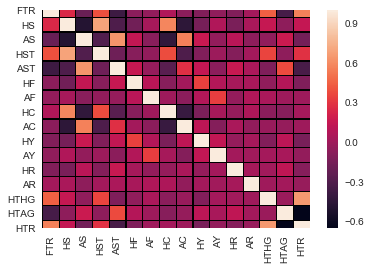

In [54]:
#Mapa de calor de correlações
sns.heatmap(df.corr(),linewidths=0.1,linecolor="black")

In [55]:
# Características
X_af = df.drop('FTR',axis=1)
# Alvo da previsão
y_af = df['FTR']

# Divisão treino/teste
X_train_af, X_test_af, y_train_af, y_test_af = train_test_split(X_af,y_af,test_size=0.3, random_state=101)

# Regressão Linear
linear_regression_af = LinearRegression()
linear_regression_af.fit(X_train_af, y_train_af)
predict_linear_regression_af = linear_regression_af.predict(X_test_af)

# Regressão Logística
logistic_regression_af = LogisticRegression()
logistic_regression_af.fit(X_train_af, y_train_af)
predict_logistic_regression_af = logistic_regression_af.predict(X_test_af)

# Árvore de Decisão
decision_tree_af = DecisionTreeClassifier()
decision_tree_af.fit(X_train_af, y_train_af)
predict_decision_tree_af = decision_tree_af.predict(X_test_af)

# Floresta Aleatória
#Método do cotovelo
error_rate = []

for i in range(1,200):
    random_forest_af = RandomForestClassifier(n_estimators=i)
    random_forest_af.fit(X_train_af, y_train_af)
    predict_random_forest_af = random_forest_af.predict(X_test_af)
    error_rate.append(np.mean(predict_random_forest_af!=y_test_af))
    
random_forest_af = RandomForestClassifier(n_estimators=error_rate.index(min(error_rate)))
random_forest_af.fit(X_train_af, y_train_af)
predict_random_forest_af = random_forest_af.predict(X_test_af)

# KNN
error_rate = []

for i in range(1,40):
    knn_af = KNeighborsClassifier(n_neighbors=i)
    knn_af.fit(X_train_af, y_train_af)
    predict_knn_af = knn_af.predict(X_test_af)
    error_rate.append(np.mean(predict_knn_af!=y_test_af))
    
knn_af = KNeighborsClassifier(n_neighbors=error_rate.index(min(error_rate)))
knn_af.fit(X_train_af, y_train_af)
predict_knn_af = knn_af.predict(X_test_af)

# SVM
param_grid = {'C':[0.1,1,10,100,1000],'gamma': [1,0.1,0.01,0.001,0.001], 'kernel':['rbf']}
grid_af = GridSearchCV(SVC(),param_grid,refit=True, verbose=3)
grid_af.fit(X_train_af, y_train_af)
predict_svm_af = grid_af.predict(X_test_af)

# MLP
mlp_classifier_af = MLPClassifier(hidden_layer_sizes=(2,8), activation='logistic', solver='adam', max_iter=1000)
mlp_classifier_af.fit(X_train_af,y_train_af)
predict_mlp_classifier_af = mlp_classifier_af.predict(X_test_af)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.544, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.545, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.545, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.611, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.682, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.625, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    1.0s finished
C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [56]:
print("Antes!!")
print('\nRegressão linear: %.2f' %(linear_regression.score(X_test, y_test)*100) + "%") 
print('\nRegressão logística: %.2f' %(logistic_regression.score(X_test, y_test)*100) + "%")
print('\nÁrvore de decisão: %.2f' %(decision_tree.score(X_test, y_test)*100) + "%")
print('\nFloresta aleatória: %.2f' %(random_forest.score(X_test, y_test)*100) + "%")
print('\nKNN: %.2f' %(knn.score(X_test, y_test)*100) + "%")
print('\nSVM: %.2f' %(grid.score(X_test, y_test)*100) + "%")

print("\n\nDepois!")
print('\nRegressão linear: %.2f' %(linear_regression_af.score(X_test_af, y_test_af)*100) + "%") 
print('\nRegressão logística: %.2f' %(logistic_regression_af.score(X_test_af, y_test_af)*100) + "%")
print('\nÁrvore de decisão: %.2f' %(decision_tree_af.score(X_test_af, y_test_af)*100) + "%")
print('\nFloresta aleatória: %.2f' %(random_forest_af.score(X_test_af, y_test_af)*100) + "%")
print('\nKNN: %.2f' %(knn_af.score(X_test_af, y_test_af)*100) + "%")
print('\nSVM: %.2f' %(grid_af.score(X_test_af, y_test_af)*100) + "%")

Antes!!

Regressão linear: 48.57%

Regressão logística: 74.56%

Árvore de decisão: 57.02%

Floresta aleatória: 65.79%

KNN: 71.05%

SVM: 65.79%


Depois!

Regressão linear: 41.72%

Regressão logística: 82.46%

Árvore de decisão: 67.54%

Floresta aleatória: 79.82%

KNN: 77.19%

SVM: 78.95%
